In [1]:
import pickle
import re

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
%%time

with open("train_hack.pckl", "rb") as f:
    df = pickle.load(f)

CPU times: user 2min 18s, sys: 2min 33s, total: 4min 51s
Wall time: 5min 18s


In [3]:
df.head()

,can_buy,can_promote,category,contacts_visible,date_created,delivery_available,description,fields,id,images,location,mortgage_available,name,payment_available,price,subcategory,subway
0,False,False,9,True,1492780671,False,,"[{'field': {'name': 'Женский гардероб', 'id': ...",3edeb34cf93f490ff760af85,"[{'id': '58fa06746c86cb4f22313452', 'num': 1, ...","{'latitude': 55.806888, 'longitude': 37.546077}",False,Сумка DG,True,199900,914,NaN
1,False,False,22,True,1476824319,False,8-12 лет,"[{'field': {'name': 'Детский гардероб', 'id': ...",c98febd50dad3cc0ffc86085,"[{'id': '58068ccc04559f59bdbda92d', 'num': 1, ...","{'latitude': 55.692979, 'longitude': 37.872337}",False,Комплект,False,35000,2202,NaN
2,False,False,22,True,1473004313,False,"На девочку 1,5 г,состояние хорошее","[{'field': {'name': 'Детский гардероб', 'id': ...",ade01e13912a46a99134cc75,"[{'id': '57cc42ecd53f3dcf17dc01c8', 'num': 1, ...","{'latitude': 55.639011, 'longitude': 37.349378}",False,Пальтишко демисезонное,False,30000,2204,NaN
3,False,False,22,True,1476307221,False,"Размер-135mm, euro-22.5.Прочная, мягкая, не ск...","[{'field': {'name': 'Детский гардероб', 'id': ...",ab3e6941c11304c1519aef75,"[{'id': '580546528ae74be97723532e', 'num': 1, ...","{'latitude': 55.847334, 'longitude': 37.495834}",False,Attipas,True,80000,2209,NaN
5,False,False,22,True,1503487787,False,,"[{'field': {'name': 'Детский гардероб', 'id': ...",252452a91c944a22c276d995,"[{'id': '599d66f3f235022f7411a535', 'num': 1, ...","{'latitude': 60.044826, 'longitude': 30.35546}",False,Жилет теплый,True,50000,2204,NaN


In [4]:
df.iloc[1000, 7]

[{'field': {'name': 'Транспорт и автотовары',
   'id': 1,
   'slug': 'avto-moto',
   'slug_id': 'avto-moto',
   'icon': {'url': {'and': 'https://api.youla.io/files/icons/icon-cat-automoto5x.png',
     'ios': 'https://api.youla.io/files/icons/icon-cat-automoto-dark4x.png',
     'ios_color': 'https://api.youla.io/files/icons/icon-cat-automoto4x.png',
     'web_svg': 'https://api.youla.io/files/icons/icon-cat-automoto.svg'}},
   'type': 'category'},
  'order': 1,
  'values': None},
 {'field': {'name': 'Шины',
   'slug': 'shiny',
   'slug_id': 'shiny',
   'id': 114,
   'parent_id': 1,
   'icon': None,
   'editable': True,
   'default': False,
   'type': 'subcategory'},
  'order': 2,
  'values': None},
 {'field': {'id': 6126,
   'name': 'Сезонность',
   'description': '',
   'field_type': 'multiselect',
   'slug_id': 'shiny_sezonnost',
   'type': 'additional_field'},
  'order': 13,
  'values': [{'selected_value': {'id': 6128, 'value': 'Летние'}}]},
 {'field': {'id': 6131,
   'name': 'Ширина

In [5]:
df.describe()

,category,date_created,price,subcategory
count,1.748890e+06,1.748890e+06,1.748890e+06,1.748890e+06
mean,1.078042e+01,1.490347e+09,3.017318e+07,1.084358e+03
std,1.071337e+01,1.115155e+07,4.741165e+09,1.070530e+03
min,1.000000e+00,1.445018e+09,-1.000000e+00,1.010000e+02
25%,4.000000e+00,1.482849e+09,3.000000e+04,4.090000e+02
50%,9.000000e+00,1.491325e+09,8.000000e+04,9.060000e+02
75%,1.300000e+01,1.499510e+09,2.500000e+05,1.317000e+03
max,1.000000e+02,1.506867e+09,1.000000e+12,1.000200e+04


In [6]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748890 entries, 0 to 99930
Data columns (total 17 columns):
can_buy               1748890 non-null bool
can_promote           1748890 non-null bool
category              1748890 non-null int64
contacts_visible      1748890 non-null bool
date_created          1748890 non-null int64
delivery_available    1748890 non-null bool
description           1748890 non-null object
fields                1748890 non-null object
id                    1748890 non-null object
images                1748890 non-null object
location              1748890 non-null object
mortgage_available    1748890 non-null bool
name                  1748890 non-null object
payment_available     1748890 non-null bool
price                 1748890 non-null int64
subcategory           1748890 non-null int64
subway                235 non-null object
dtypes: bool(6), int64(4), object(7)
memory usage: 210.1+ MB


In [7]:
df[df["subway"].notnull()]["subway"].head()

5815     {'name': 'Октябрьская', 'color': '', 'icon': {...
7516     {'name': 'Минская', 'color': '', 'icon': {'url...
19858    {'name': 'Московская', 'color': '', 'icon': {'...
27484    {'name': 'Тропарево', 'color': '', 'icon': Non...
32379    {'name': 'Победа', 'color': '', 'icon': {'url'...
Name: subway, dtype: object

In [8]:
df["date_created"].head()

0    1492780671
1    1476824319
2    1473004313
3    1476307221
5    1503487787
Name: date_created, dtype: int64

In [9]:
df["description"].head()

0                                                     
1                                             8-12 лет
2                  На девочку 1,5 г,состояние хорошее 
3    Размер-135mm, euro-22.5.Прочная, мягкая, не ск...
5                                                     
Name: description, dtype: object

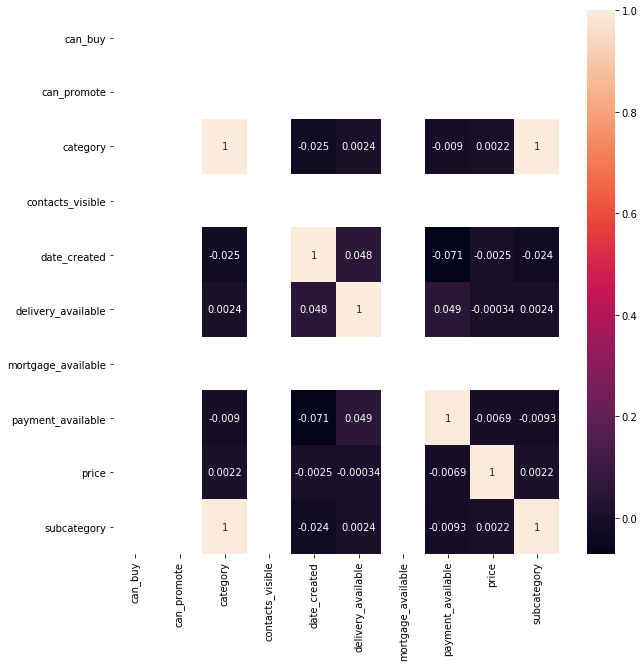

In [10]:
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), ax = ax, annot=True)

In [11]:
df.head()

,can_buy,can_promote,category,contacts_visible,date_created,delivery_available,description,fields,id,images,location,mortgage_available,name,payment_available,price,subcategory,subway
0,False,False,9,True,1492780671,False,,"[{'field': {'name': 'Женский гардероб', 'id': ...",3edeb34cf93f490ff760af85,"[{'id': '58fa06746c86cb4f22313452', 'num': 1, ...","{'latitude': 55.806888, 'longitude': 37.546077}",False,Сумка DG,True,199900,914,NaN
1,False,False,22,True,1476824319,False,8-12 лет,"[{'field': {'name': 'Детский гардероб', 'id': ...",c98febd50dad3cc0ffc86085,"[{'id': '58068ccc04559f59bdbda92d', 'num': 1, ...","{'latitude': 55.692979, 'longitude': 37.872337}",False,Комплект,False,35000,2202,NaN
2,False,False,22,True,1473004313,False,"На девочку 1,5 г,состояние хорошее","[{'field': {'name': 'Детский гардероб', 'id': ...",ade01e13912a46a99134cc75,"[{'id': '57cc42ecd53f3dcf17dc01c8', 'num': 1, ...","{'latitude': 55.639011, 'longitude': 37.349378}",False,Пальтишко демисезонное,False,30000,2204,NaN
3,False,False,22,True,1476307221,False,"Размер-135mm, euro-22.5.Прочная, мягкая, не ск...","[{'field': {'name': 'Детский гардероб', 'id': ...",ab3e6941c11304c1519aef75,"[{'id': '580546528ae74be97723532e', 'num': 1, ...","{'latitude': 55.847334, 'longitude': 37.495834}",False,Attipas,True,80000,2209,NaN
5,False,False,22,True,1503487787,False,,"[{'field': {'name': 'Детский гардероб', 'id': ...",252452a91c944a22c276d995,"[{'id': '599d66f3f235022f7411a535', 'num': 1, ...","{'latitude': 60.044826, 'longitude': 30.35546}",False,Жилет теплый,True,50000,2204,NaN


In [162]:
pd.options.mode.chained_assignment = None

def preprocessing(df, target_label=None):
    
    if 'price' in df.columns:
        df['price'] /= 100
#         df = df.loc[(df['price'] < 100000) & (df['price'] > 100)]
#         df = df.loc[(df['price'] < 10000) & (df['price'] > 100)]
#         df = df.loc[(df['price'] < 5000) & (df['price'] > 100)]
        df = df.loc[(df['price'] < 3000) & (df['price'] > 100)]
    
    df['latitude'] = df['location'].apply(lambda x: x['latitude'])
    df['longitude'] = df['location'].apply(lambda x: x['longitude'])
    
    df['fields'] = df['fields'].apply(lambda x: x[0]['field']['name'] if len(x) > 0 else '')
    
    df['subway'] = df['subway'].apply(lambda x: x['name'] if type(x) is dict else 'Не указано')
    
    df['description'] = df['description'].apply(lambda x: x if len(x) > 0 else '')
    
    df['text'] = df['name'] + ' ' + df['fields'] + ' ' + df['description']

    df = df.drop(['location', 'subcategory', 'id', 'images', 'name', 'description', 'fields', 'subway'], axis=1)
    
    if target_label is not None:
        y = df[target_label]
        df = df.drop(target_label, axis=1)
        
        return df, y
    
    return df

In [163]:
copy = df.copy()

In [164]:
%%time

X, y = preprocessing(copy, 'price')

CPU times: user 11.1 s, sys: 33.8 s, total: 44.9 s
Wall time: 1min 4s


# Machine learning

In [15]:
from pymystem3 import Mystem
from nltk.corpus import stopwords

In [16]:
from mlxtend.feature_selection import ColumnSelector

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from scipy import sparse

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR, SVR

from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
def root_mean_squared_log_error(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def rmsle_scorer(estimator, X, y):
    y_hat = estimator.predict(X)
    
    return root_mean_squared_log_error(y, y_hat)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmse_scorer(estimator, X, y):
    y_hat = estimator.predict(X)
    
    return root_mean_squared_error(y, y_hat)

In [19]:
mystem = Mystem()

def tokenizer(text):
    lemm = mystem.lemmatize(text)
    
    return [x for x in lemm if re.match(r'[а-яёa-z]{2,}', x)]

In [20]:
class ModifiedLabelEncoder(LabelEncoder):

    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [21]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [22]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [23]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output=False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

In [157]:
def prediction_to_csv(X_test, y_hat, ids):
    from datetime import datetime
    
    tranform = np.vectorize(lambda x: x if x >= 0 else 0)
    y_hat = tranform(y_hat)
    
    df_predict = pd.DataFrame()
    
    df_predict['id'] = ids
    df_predict['price'] = y_hat
    
    today = datetime.today().strftime('%Y-%m-%d_%H-%M')
    df_predict.to_csv(path_or_buf='./submission/submission_{today}.cvs'.format(today=today), index=False, sep=',')

In [25]:
def print_grid_info(grid):
    print('-'  * 10, 'BEST PARAMS', '-' * 10)
    print(grid.best_params_)

    mean_scores = grid.cv_results_['mean_test_score']
    std_scores = grid.cv_results_['std_test_score']

    print('-'  * 10, 'ROC_AUC SCORES', '-' * 10)
    print(mean_scores)
    print('-'  * 10, 'STD SCORES', '-' * 10)
    print(std_scores)
    
    print('-'  * 10, 'MEAN OF ROC_AUC AND STD SCORES', '-' * 10)
    print(mean_scores.mean(), mean_scores.std())
    
    print('-'  * 10, 'BEST USING', '-' * 10)
    print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
    
    print('-'  * 10, 'CV RESULTS', '-' * 10)
    print(grid.cv_results_)

In [26]:
kf = KFold(n_splits=3, shuffle=True)

In [27]:
pipe_sgd = Pipeline([
    ('union', FeatureUnion([
        ('binarize', Pipeline([
             ('selector', DataFrameSelector(X.select_dtypes(include='bool').columns)),
             ('lb', CustomLabelBinarizer()),
         ])),
         ('onehot', Pipeline([
             ('selector', DataFrameSelector(['category'])),
             ('ce', CategoricalEncoder(handle_unknown='ignore')),
         ])),
        ('text', Pipeline([
            ('selector', DataFrameSelector('text')),
            ('tfidf', TfidfVectorizer(norm=None, smooth_idf=False, stop_words=stopwords.words('russian'), lowercase=False)),
        ])),
    ])),
    ('rfr', SGDRegressor(verbose=10, n_iter=100, loss='huber'))
])

In [28]:
pipe_svm = Pipeline([
    ('union', FeatureUnion([
        ('binarize', Pipeline([
             ('selector', DataFrameSelector(X.select_dtypes(include='bool').columns)),
             ('lb', CustomLabelBinarizer()),
         ])),
         ('onehot', Pipeline([
             ('selector', DataFrameSelector(['category'])),
             ('ce', CategoricalEncoder(handle_unknown='ignore')),
         ])),
        ('text', Pipeline([
            ('selector', DataFrameSelector('text')),
            ('tfidf', TfidfVectorizer(norm=None, smooth_idf=False, stop_words=stopwords.words('russian'), lowercase=False)),
        ])),
    ])),
    ('svm', LinearSVR())
])

In [68]:
param_grid_svm = {
    'svm__tol': [1e-4],
    'svm__C': [0.01],
    'svm__epsilon': [0.001],
}

In [69]:
svm_grid = GridSearchCV(pipe_svm,
                        cv=kf,
                        n_jobs=4,
                        verbose=30,
                        param_grid=param_grid_svm,
                        scoring=rmsle_scorer,
            )

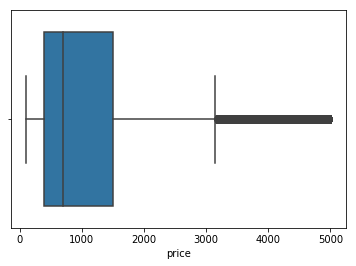

In [134]:
sns.boxplot(y)

In [165]:
%%time

pipe_sgd.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


-- Epoch 1
Norm: 104.43, NNZs: 449833, Bias: 0.433398, T: 1149477, Avg. loss: 70.199379
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 147.33, NNZs: 449833, Bias: 0.633538, T: 2298954, Avg. loss: 57.416789
Total training time: 0.91 seconds.
-- Epoch 3
Norm: 172.44, NNZs: 449833, Bias: 0.761953, T: 3448431, Avg. loss: 52.899241
Total training time: 1.42 seconds.
-- Epoch 4
Norm: 189.38, NNZs: 449833, Bias: 0.855236, T: 4597908, Avg. loss: 50.566217
Total training time: 1.91 seconds.
-- Epoch 5
Norm: 201.84, NNZs: 449833, Bias: 0.928092, T: 5747385, Avg. loss: 49.092707
Total training time: 2.42 seconds.
-- Epoch 6
Norm: 211.58, NNZs: 449833, Bias: 0.987948, T: 6896862, Avg. loss: 48.042129
Total training time: 2.92 seconds.
-- Epoch 7
Norm: 219.54, NNZs: 449833, Bias: 1.038950, T: 8046339, Avg. loss: 47.235250
Total training time: 3.43 seconds.
-- Epoch 8
Norm: 226.31, NNZs: 449833, Bias: 1.083841, T: 9195816, Avg. loss: 46.583380
Total training time: 3.91 seconds.
-- Epoch 9
Norm:

Norm: 326.99, NNZs: 449833, Bias: 2.235020, T: 77014959, Avg. loss: 39.953405
Total training time: 32.15 seconds.
-- Epoch 68
Norm: 327.51, NNZs: 449833, Bias: 2.249221, T: 78164436, Avg. loss: 39.930461
Total training time: 32.66 seconds.
-- Epoch 69
Norm: 328.02, NNZs: 449833, Bias: 2.263356, T: 79313913, Avg. loss: 39.908282
Total training time: 33.13 seconds.
-- Epoch 70
Norm: 328.52, NNZs: 449833, Bias: 2.277438, T: 80463390, Avg. loss: 39.886680
Total training time: 33.60 seconds.
-- Epoch 71
Norm: 329.00, NNZs: 449833, Bias: 2.291452, T: 81612867, Avg. loss: 39.865350
Total training time: 34.12 seconds.
-- Epoch 72
Norm: 329.47, NNZs: 449833, Bias: 2.305409, T: 82762344, Avg. loss: 39.845165
Total training time: 34.60 seconds.
-- Epoch 73
Norm: 329.93, NNZs: 449833, Bias: 2.319302, T: 83911821, Avg. loss: 39.825111
Total training time: 35.10 seconds.
-- Epoch 74
Norm: 330.37, NNZs: 449833, Bias: 2.333127, T: 85061298, Avg. loss: 39.805768
Total training time: 35.57 seconds.
-- E

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('binarize', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=Index(['can_buy', 'can_promote', 'contacts_visible', 'delivery_available',
       'mortgage_available', 'payment_available'],
      dtype='ob...wer_t=0.25,
       random_state=None, shuffle=True, tol=None, verbose=10,
       warm_start=False))])

In [166]:
%%time

pipe_svm.fit(X, y)

CPU times: user 2min 3s, sys: 2.52 s, total: 2min 6s
Wall time: 2min 7s


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('binarize', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=Index(['can_buy', 'can_promote', 'contacts_visible', 'delivery_available',
       'mortgage_available', 'payment_available'],
      dtype='ob...ing=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [ ]:
csv = cross_val_score(pipe_svm, X, y, cv=kf, verbose=10, scoring=rmse_scorer)

# Prediction

In [147]:
%%time

with open("test_hack.pckl", "rb") as f:
    test = pickle.load(f)

CPU times: user 1min 48s, sys: 5min 9s, total: 6min 58s
Wall time: 8min 32s


In [150]:
ids = test['id']

In [151]:
%%time

X_test = preprocessing(test)

CPU times: user 12.4 s, sys: 24.2 s, total: 36.6 s
Wall time: 41.6 s


In [167]:
y_hat = pipe_svm.predict(X_test)

In [168]:
prediction_to_csv(X_test, y_hat, ids)

In [169]:
y_hat_sgd = pipe_sgd.predict(X_test)

In [170]:
prediction_to_csv(X_test, y_hat_sgd, ids)